In [ ]:
import numpy as np
from scipy.stats import gamma, expon, weibull_min
import matplotlib.pyplot as plt

# Моделирование

In [ ]:
#(@@@@ PARAMETERS @@@@)

# Weibull distribution
w_lambda = 1
w_k = 2

# Exponential distribution
exp_lambda = 1

# Gamma distribution
gamma_alpha = 2
gamma_beta = 1

# Experience time
T = 1000

In [ ]:
# VARIABLES
state_history = []
switch_time_track =[]

average_time_state0 = []
average_time_state1 = []
average_time_state2 = []

total_time_spent_state0 = 0
total_time_spent_state1 = 0
total_time_spent_state2 = 0

count_state0 = 0
count_state1 = 0
count_state2 = 0

switch_01 = 0
switch_10 = 0
switch_12 = 0
switch_20 = 0

In [ ]:
state = 0 # В начале мы в состоянии 0
switch_time_track.append(0)

current_time = 0 # Чтобы следовать за времени

while current_time < T:
   #state = 0
    count_state0 += 1
    state_history.append(0)

    A01 = weibull_min.rvs(w_k,loc=0,scale=w_lambda)

    average_time_state0.append(A01)
    total_time_spent_state0 += A01
    current_time += A01
    switch_01 += 1
    switch_time_track.append(current_time)
    
    #state = 1
    count_state1 += 1
    state_history.append(1)

    A12 = weibull_min.rvs(w_k,loc=0,scale=w_lambda)
    B = expon.rvs(loc=0,scale=1/exp_lambda)

    average_time_state1.append(min(A12,B))
    total_time_spent_state1 += min(A12,B)
    current_time += min(A12,B)
    switch_time_track.append(current_time)


    if B <= A12:
          switch_10 += 1
      #state = 0
    else:
        switch_12 += 1

        #state = 2
        count_state2 += 1
        state_history.append(2)

        C = gamma.rvs(gamma_alpha,loc=0,scale=1/gamma_beta)

        average_time_state2.append(C)
        total_time_spent_state2 += C
        current_time += C
        switch_20 += 1
        switch_time_track.append(current_time)
        #state = 0
state_history.append(0)

In [ ]:
state_history = np.array(state_history)
switch_time_track = np.array(switch_time_track)

In [ ]:
switch_time_track[:20]

array([ 0.        ,  1.29171571,  1.30409577,  1.59095901,  2.16410151,
        5.97161596,  7.02104015,  7.62021975, 10.26863791, 11.00928723,
       11.55838282, 12.42574725, 12.5172795 , 13.13250954, 14.43793737,
       15.4687787 , 17.97199751, 19.16050926, 19.63441401, 20.38066391])

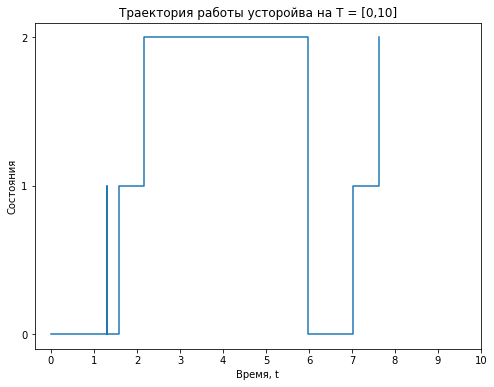

In [ ]:
plt.figure(figsize=(8,6))
plt.step(switch_time_track[switch_time_track<10],state_history[switch_time_track<10],where='post')
plt.xlabel("Время, t")
plt.ylabel("Состояния")
plt.title("Траектория работы усторойва на T = [0,10]")
plt.xticks(np.arange(11))
plt.yticks(np.arange(3))
plt.show()

In [ ]:
print("Среднее время пребывания в состояния 0: ",np.mean(average_time_state0))
print("Среднее время пребывания в состояния 1: ",np.mean(average_time_state1))
print("Среднее время пребывания в состояния 2: ",np.mean(average_time_state2))

Среднее время пребывания в состояния 0:  0.8889347283250006
Среднее время пребывания в состояния 1:  0.5799280624135285
Среднее время пребывания в состояния 2:  2.011315194957148


In [ ]:
print("Вероятность p01: ",switch_01/count_state0)
print("Вероятность p10: ",switch_10/count_state1)
print("Вероятность p12: ",switch_12/count_state1)
print("Вероятность p20: ",switch_20/count_state2)

Вероятность p01:  1.0
Вероятность p10:  0.5288461538461539
Вероятность p12:  0.47115384615384615
Вероятность p20:  1.0


In [ ]:
print("Вероятность pi_0: ",total_time_spent_state0/T)
print("Вероятность pi_1: ",total_time_spent_state1/T)
print("Вероятность pi_2: ",total_time_spent_state2/T)

Вероятность pi_0:  0.36979684698320014
Вероятность pi_1:  0.24125007396402798
Вероятность pi_2:  0.3942177782116008


In [ ]:
A5 = 25*np.sqrt(np.pi) / 2
C5 = 2
rho = np.linspace(0.01,10,500)
B5 = A5 / rho - C5

In [ ]:
B5

array([2.21356731e+03, 3.66028293e+02, 1.98681791e+02, 1.35953034e+02,
       1.03100809e+02, 8.28860022e+01, 6.91929429e+01, 5.93039343e+01,
       5.18271146e+01, 4.59758319e+01, 4.12719497e+01, 3.74081065e+01,
       3.41777218e+01, 3.14368190e+01, 2.90819806e+01, 2.70370058e+01,
       2.52445094e+01, 2.36604525e+01, 2.22504755e+01, 2.09873772e+01,
       1.98493431e+01, 1.88186748e+01, 1.78808628e+01, 1.70238995e+01,
       1.62377620e+01, 1.55140182e+01, 1.48455238e+01, 1.42261849e+01,
       1.36507719e+01, 1.31147719e+01, 1.26142695e+01, 1.21458514e+01,
       1.17065283e+01, 1.12936711e+01, 1.09049582e+01, 1.05383317e+01,
       1.01919613e+01, 9.86421332e+00, 9.55362531e+00, 9.25888395e+00,
       8.97880663e+00, 8.71232556e+00, 8.45847417e+00, 8.21637537e+00,
       7.98523147e+00, 7.76431535e+00, 7.55296287e+00, 7.35056616e+00,
       7.15656778e+00, 6.97045565e+00, 6.79175847e+00, 6.62004175e+00,
       6.45490432e+00, 6.29597515e+00, 6.14291062e+00, 5.99539198e+00,
      

In [ ]:
def prob_pi2(expo_B):
    current_time, time_state2 = 0, 0
    while current_time < 100000:      
        A01 = weibull_min.rvs(w_k,loc=0,scale=25)
        current_time += A01

        #state = 1
        A12 = weibull_min.rvs(w_k,loc=0,scale=25)
        B = expon.rvs(loc=0,scale=expo_B)
        current_time += min(A12,B)

        if A12 < B:
            #state = 2
            C = gamma.rvs(gamma_alpha,loc=0,scale=1/gamma_beta)
            time_state2 += C
            current_time += C
    return time_state2 / current_time

In [ ]:
prob_pi2(1)

0.0003782218576500537

In [ ]:
pi2 = [prob_pi2(exp_mean_B) for exp_mean_B in B5]

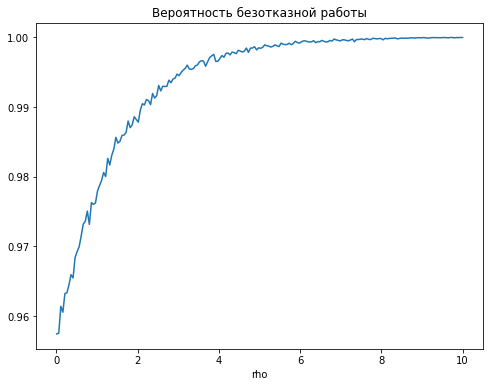

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(rho,1-np.array(pi2))
plt.xlabel("rho")
plt.xticks([0,2,4,6,8,10])
#plt.yticks([0, 0.2, 0.5,0.8,1])
plt.title("Вероятность безотказной работы")
plt.show()

Text(0.5, 1.0, 'Вероятность безотказной работы')

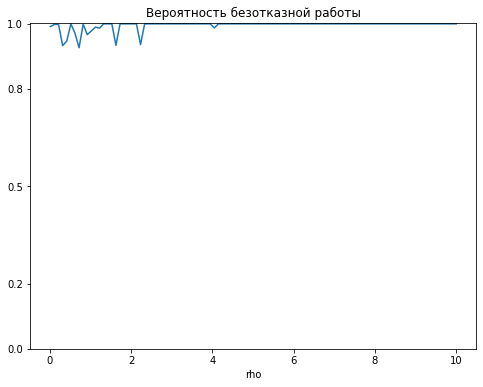

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(rho,1-np.array(pi2))
plt.xlabel("rho")
plt.xticks([0,2,4,6,8,10])
plt.yticks([0, 0.2, 0.5,0.8,1])
plt.title("Вероятность безотказной работы")
plt.show()

In [ ]:
exp_mean

array([1.77145385e+03, 1.58811413e+02, 8.26780788e+01, 5.56773034e+01,
       4.18505327e+01, 3.34469830e+01, 2.77991025e+01, 2.37423761e+01,
       2.06874220e+01, 1.83039528e+01, 1.63924999e+01, 1.48254808e+01,
       1.35174924e+01, 1.24092107e+01, 1.14581421e+01, 1.06330503e+01,
       9.91046019e+00, 9.27238797e+00, 8.70482447e+00, 8.19669451e+00,
       7.73912701e+00, 7.32493269e+00, 6.94822355e+00, 6.60413119e+00,
       6.28859527e+00, 5.99820257e+00, 5.73006295e+00, 5.48171289e+00,
       5.25103955e+00, 5.03622054e+00, 4.83567565e+00, 4.64802791e+00,
       4.47207195e+00, 4.30674806e+00, 4.15112083e+00, 4.00436149e+00,
       3.86573306e+00, 3.73457804e+00, 3.61030796e+00, 3.49239455e+00,
       3.38036225e+00, 3.27378175e+00, 3.17226458e+00, 3.07545827e+00,
       2.98304236e+00, 2.89472480e+00, 2.81023888e+00, 2.72934054e+00,
       2.65180602e+00, 2.57742979e+00, 2.50602272e+00, 2.43741050e+00,
       2.37143219e+00, 2.30793898e+00, 2.24679307e+00, 2.18786664e+00,
      